In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as c
import scipy.fftpack as fft
import scipy.ndimage as ndi
import scipy as sp
from PIL import Image
import matplotlib.image as mpimg
import csv


In [2]:
def px_remove(array, x, y):
    temp = array
    temp[y,x]=(temp[y+1,x]+temp[y-1,x]+temp[y,x+1]+temp[y,x-1])/4
    return temp
    

In [5]:
#Load Helical Simulation
helical_sim = np.loadtxt("m_Bz_010_mT.txt")

helical_sim = np.rot90(helical_sim)

In [6]:
#Load Skyrmion Simulation
skyrmion_sim = np.loadtxt("m_Bz_200_mT.txt")

In [5]:
#Load Conical Simulation
conical_sim = np.loadtxt("m_Bx_200_mT.txt")

In [6]:
#Load Skyrmion Holo Image
skyrmion_holo = np.loadtxt('skyrmions.csv',dtype='float',delimiter=',')

In [7]:
#Load Helical Holo Image
helical_holo = np.loadtxt('helix.csv',dtype='float',delimiter=',')

In [8]:
#Load conical Holo Image
conical_holo = np.loadtxt('cone.csv',dtype='float',delimiter=',')

In [9]:
#Load Skyrmion STXM Image
scan_num = 4011
lefty=np.loadtxt('MPI_19032%d_a.xim' % scan_num)

raw=lefty

background = sp.ndimage.gaussian_filter(raw,3)

a = raw - background
magnetic1=(a-np.amin(a))/np.amax(a)

magnetic1 = px_remove(magnetic1, 13, 57)
magnetic1 = px_remove(magnetic1, 29, 13)
magnetic1 = px_remove(magnetic1, 68, 87)
magnetic1 = px_remove(magnetic1, 20, 37)
magnetic1 = px_remove(magnetic1, 27, 17)
magnetic1 = px_remove(magnetic1, 73, 53)
magnetic1 = px_remove(magnetic1, 72, 53)
magnetic1 = px_remove(magnetic1, 71, 53)
magnetic1 = px_remove(magnetic1, 74, 53)
magnetic1 = px_remove(magnetic1, 75, 53)
magnetic1 = px_remove(magnetic1, 70, 53)

skyrmion_stxm = px_remove(magnetic1, 69, 53)

im = Image.fromarray(skyrmion_stxm)
im.save('sk_stxm.tif')

In [39]:
#Load Helical STXM Image

scan_num = 190306018
lefty=np.loadtxt('MPI_%d_a.xim' % scan_num)

raw=lefty

raw = px_remove(raw, 9, 37)
raw = px_remove(raw, 64, 40)

background = sp.ndimage.gaussian_filter(raw,3)

a = raw - background
helical_stxm=(a-np.amin(a))/np.amax(a)

helical_stxm1 = np.flipud(helical_stxm1)

im = Image.fromarray(helical_stxm1)
im.save('heli_stxm.tif')


<IPython.core.display.Javascript object>


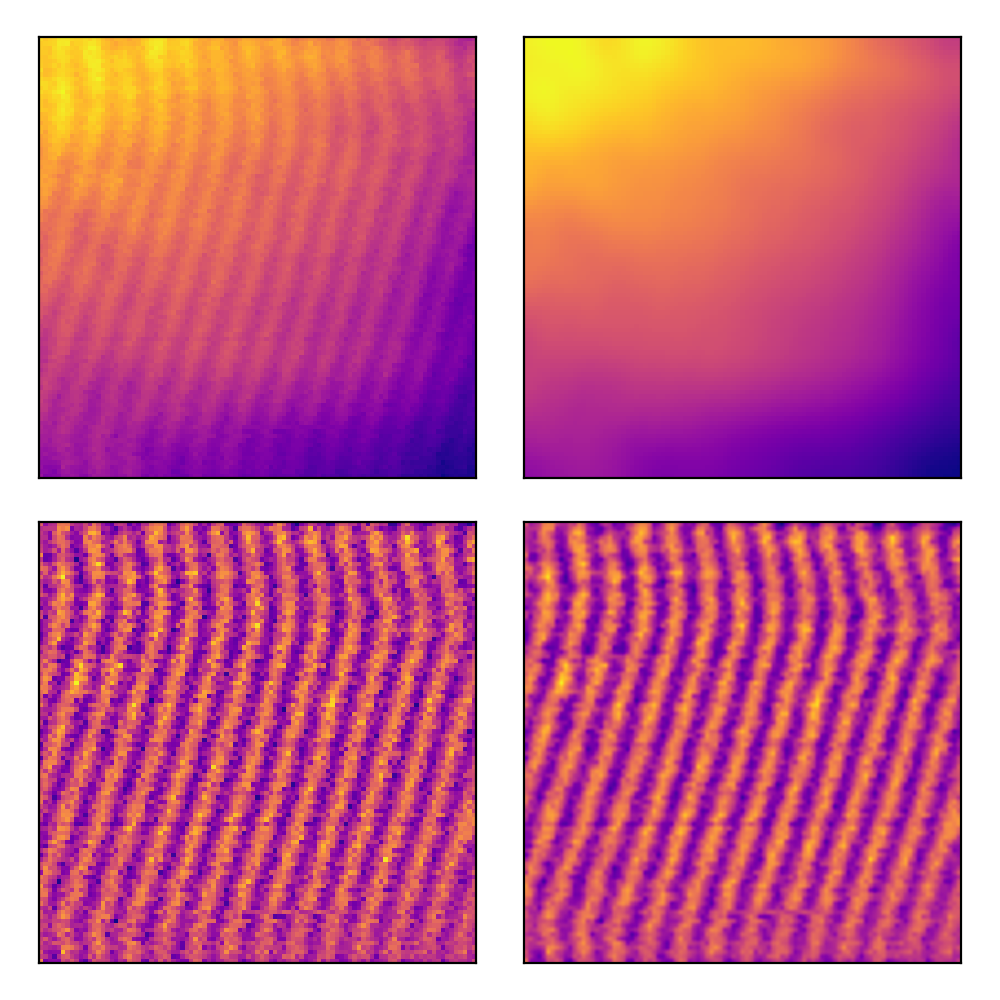

In [41]:
%matplotlib notebook
plt.figure(figsize=(5,5))
ax1=plt.subplot2grid((2,2),(0,0), rowspan=1,colspan=1)
plt.imshow(raw[:,:-1],cmap='plasma')
plt.xticks([])
plt.yticks([])

ax2=plt.subplot2grid((2,2),(0,1), rowspan=1,colspan=1)
plt.imshow(background[:,:-1],cmap='plasma')
plt.xticks([])
plt.yticks([])

ax3=plt.subplot2grid((2,2),(1,0), rowspan=1,colspan=1)
plt.imshow(helical_stxm1[:,:-1],cmap='plasma')
plt.xticks([])
plt.yticks([])

ax4=plt.subplot2grid((2,2),(1,1), rowspan=1,colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(helical_stxm1[:,:-1],0.5),cmap='plasma',interpolation='hamming')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()
plt.savefig('Fig_Processing.png',dpi=300)

In [11]:
#Load conical STXM Image

scan_num = 190411047
lefty=np.loadtxt('MPI_%d_a.xim' % scan_num)

raw=lefty

background = sp.ndimage.gaussian_filter(raw,3)

a = raw - background
conical_stxm=(a-np.amin(a))/np.amax(a)

conical_stxm = px_remove(conical_stxm, 2, 3)

im = Image.fromarray(conical_stxm)
im.save('coni_stxm.tif')

In [12]:
#Load Skyrmion LTEM Image

skyrmion_ltem = img=mpimg.imread('skyrmion_LTEM.png')
helical_ltem = img=mpimg.imread('LTEM_Helices.jpg')
skyrmion_ltem = img=mpimg.imread('LTEM_SkL.jpg')




<IPython.core.display.Javascript object>


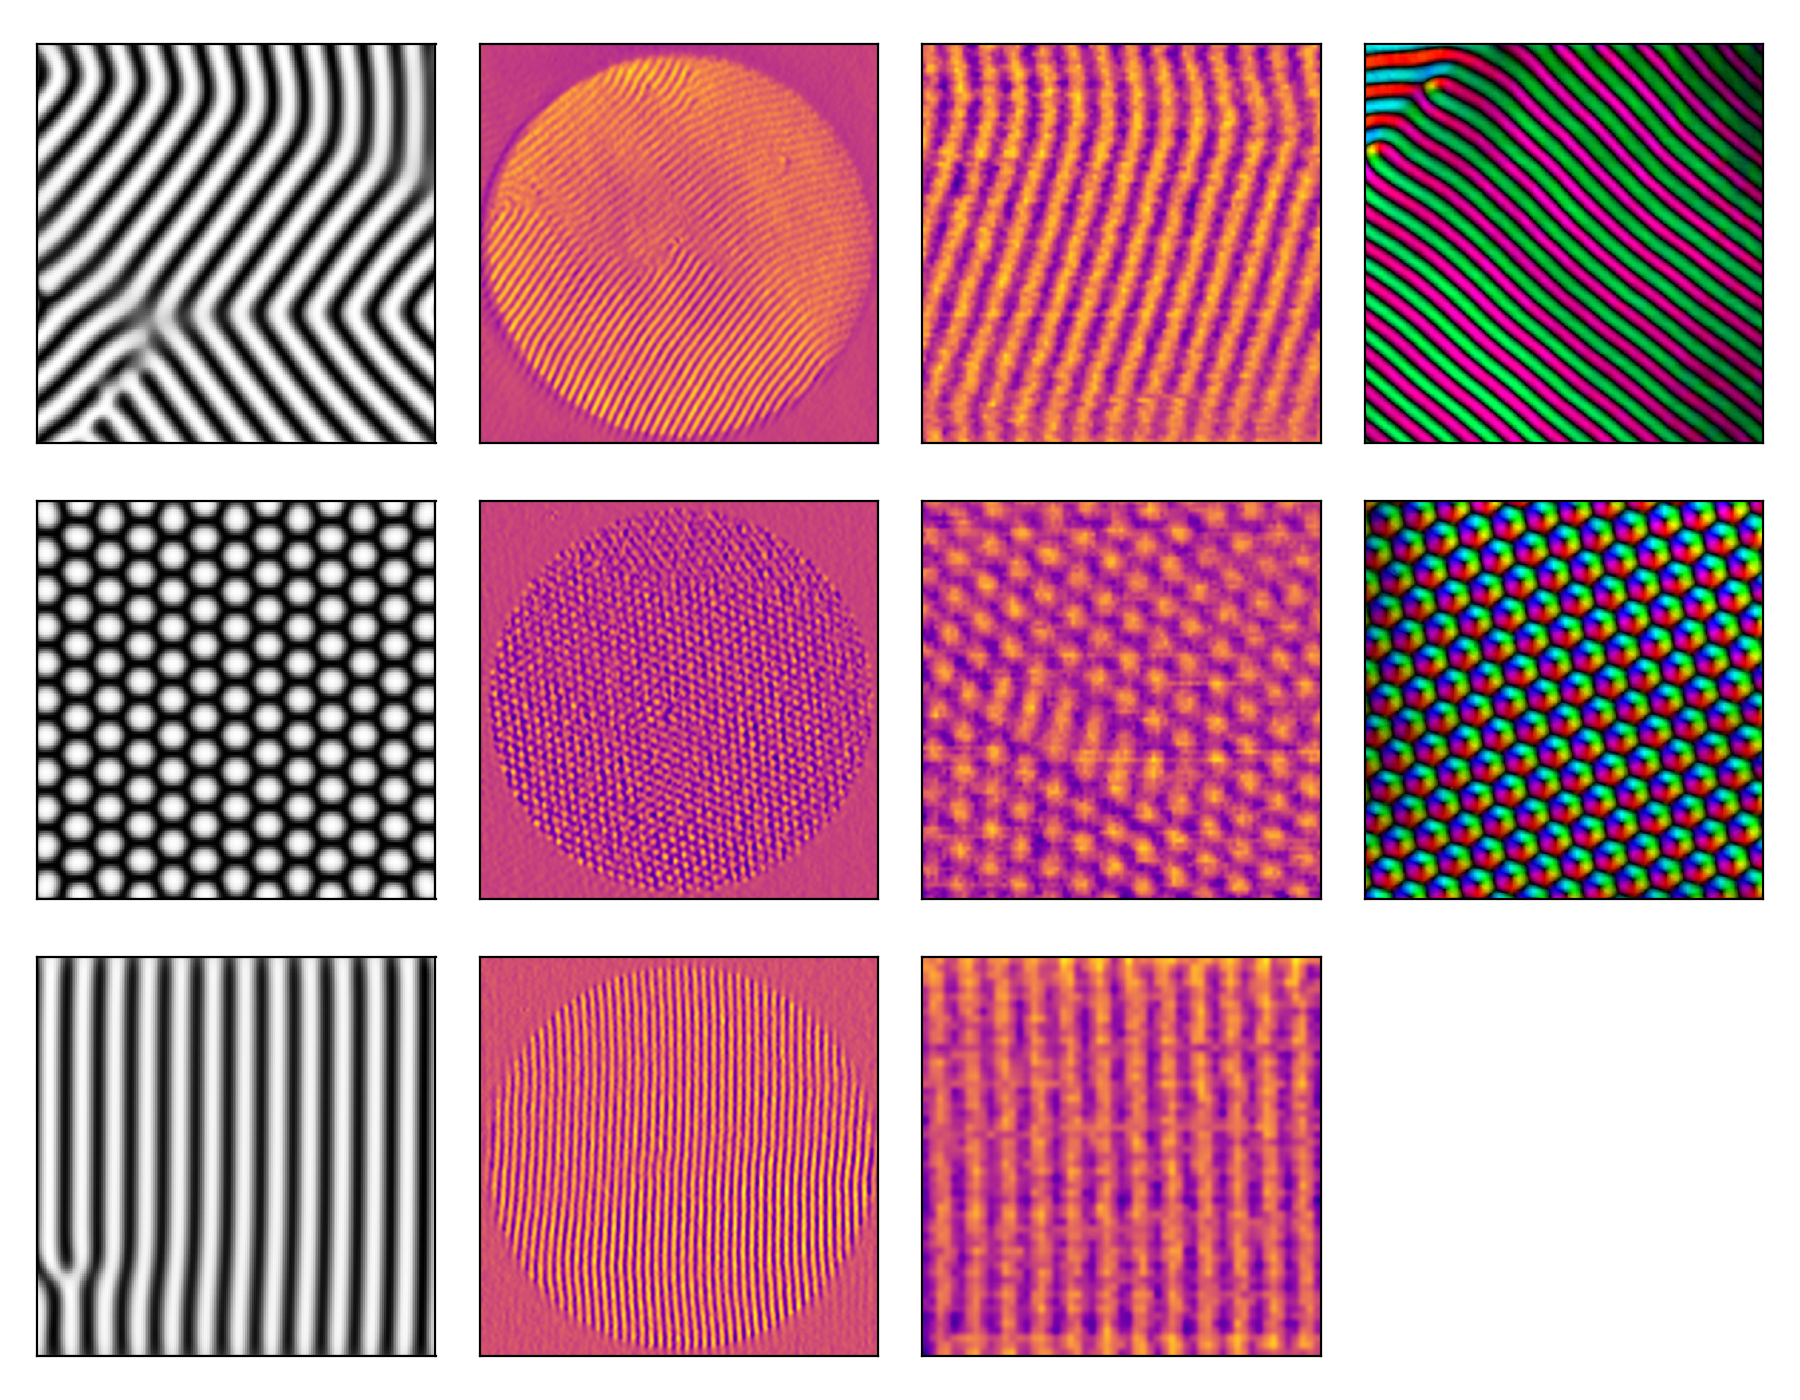

In [13]:
%matplotlib notebook
plt.figure(figsize=(9,7))

#### SIMS ####

ax1=plt.subplot2grid((3,4),(0,0), rowspan=1,colspan=1)
plt.imshow(helical_sim[10:240,10:240],interpolation='none',cmap = 'Greys')
plt.xticks([])
plt.yticks([])

ax2=plt.subplot2grid((3,4),(1,0), rowspan=1,colspan=1)
plt.imshow(skyrmion_sim[10:240,10:240],interpolation='none',cmap = 'Greys')
plt.xticks([])
plt.yticks([])

ax3=plt.subplot2grid((3,4),(2,0), rowspan=1,colspan=1)
plt.imshow(conical_sim[10:240,10:240],interpolation='none',cmap = 'Greys')
plt.xticks([])
plt.yticks([])

#### Holography ####

ax4=plt.subplot2grid((3,4),(0,1), rowspan=1,colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(helical_holo[5:145,5:145],0),interpolation='bicubic',cmap = 'plasma_r')
plt.clim(vmin=-1.2,vmax=0.8)
#plt.colorbar()
plt.xticks([])
plt.yticks([])

ax5=plt.subplot2grid((3,4),(1,1), rowspan=1,colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(skyrmion_holo[5:145,5:145],0),interpolation='bicubic',cmap = 'plasma_r')
plt.clim(vmin=-0.25,vmax=0.25)
plt.xticks([])
plt.yticks([])

ax6=plt.subplot2grid((3,4),(2,1), rowspan=1,colspan=1)
plt.imshow(sp.ndimage.gaussian_filter(conical_holo[5:145,5:145],0),interpolation='bicubic',cmap = 'plasma_r')
plt.clim(vmin=-0.5,vmax=0.5)
plt.xticks([])
plt.yticks([])

#### STXM ####

ax7=plt.subplot2grid((3,4),(0,2), rowspan=1,colspan=1)

plt.imshow(sp.ndimage.gaussian_filter(helical_stxm1[0:98,0:98],0.5)

            ,interpolation='hamming'
            ,origin='lower'
            ,cmap = 'plasma_r'
          #,extent =[0,1,0,1]
    )

plt.xticks([])
plt.yticks([])

ax8=plt.subplot2grid((3,4),(1,2), rowspan=1,colspan=1)

plt.imshow(sp.ndimage.gaussian_filter(skyrmion_stxm[0:99,0:99],0.5)
            ,interpolation='hamming'
            ,origin='lower'
            ,cmap = 'plasma_r'
          #,extent =[0,1,0,1]
    )

plt.xticks([])
plt.yticks([])

ax9=plt.subplot2grid((3,4),(2,2), rowspan=1,colspan=1)

plt.imshow(sp.ndimage.gaussian_filter(conical_stxm[0:55,5:60],0.5)
            ,interpolation='hamming'
            ,origin='lower'
            ,cmap = 'plasma_r'
          #,extent =[0,1,0,1]
    )
plt.xticks([])
plt.yticks([])


#### LTEM ####

ax10=plt.subplot2grid((3,4),(0,3), rowspan=1,colspan=1)
plt.imshow(helical_ltem)
plt.xticks([])
plt.yticks([])

ax11=plt.subplot2grid((3,4),(1,3), rowspan=1,colspan=1)
plt.imshow(skyrmion_ltem)

plt.xticks([])
plt.yticks([])

plt.tight_layout()

plt.savefig('Fig_4.png',dpi=300)

In [119]:
print(np.shape(skyrmion_stxm))
print(np.shape(helical_stxm))
print(np.shape(conical_stxm))

(100, 100)
(100, 100)
(67, 67)


In [60]:
#Load Image
start = 4017
end = 4024
scan_nums = np.arange(start,end+1,1)
#scan_nums = [7067,7068,7071,7072,7073,7074,7075]
images = []
print(scan_nums)
for i in np.arange(0,len(scan_nums),1):
    lefty=np.loadtxt('MPI_19032%d_a.xim' % scan_nums[i])
    raw=lefty
    bg = sp.ndimage.gaussian_filter(raw,5)
    a = raw - bg
    images.append((a-np.amin(a))/np.amax(a))

print(len(images))

[4017 4018 4019 4020 4021 4022 4023 4024]
8


<IPython.core.display.Javascript object>


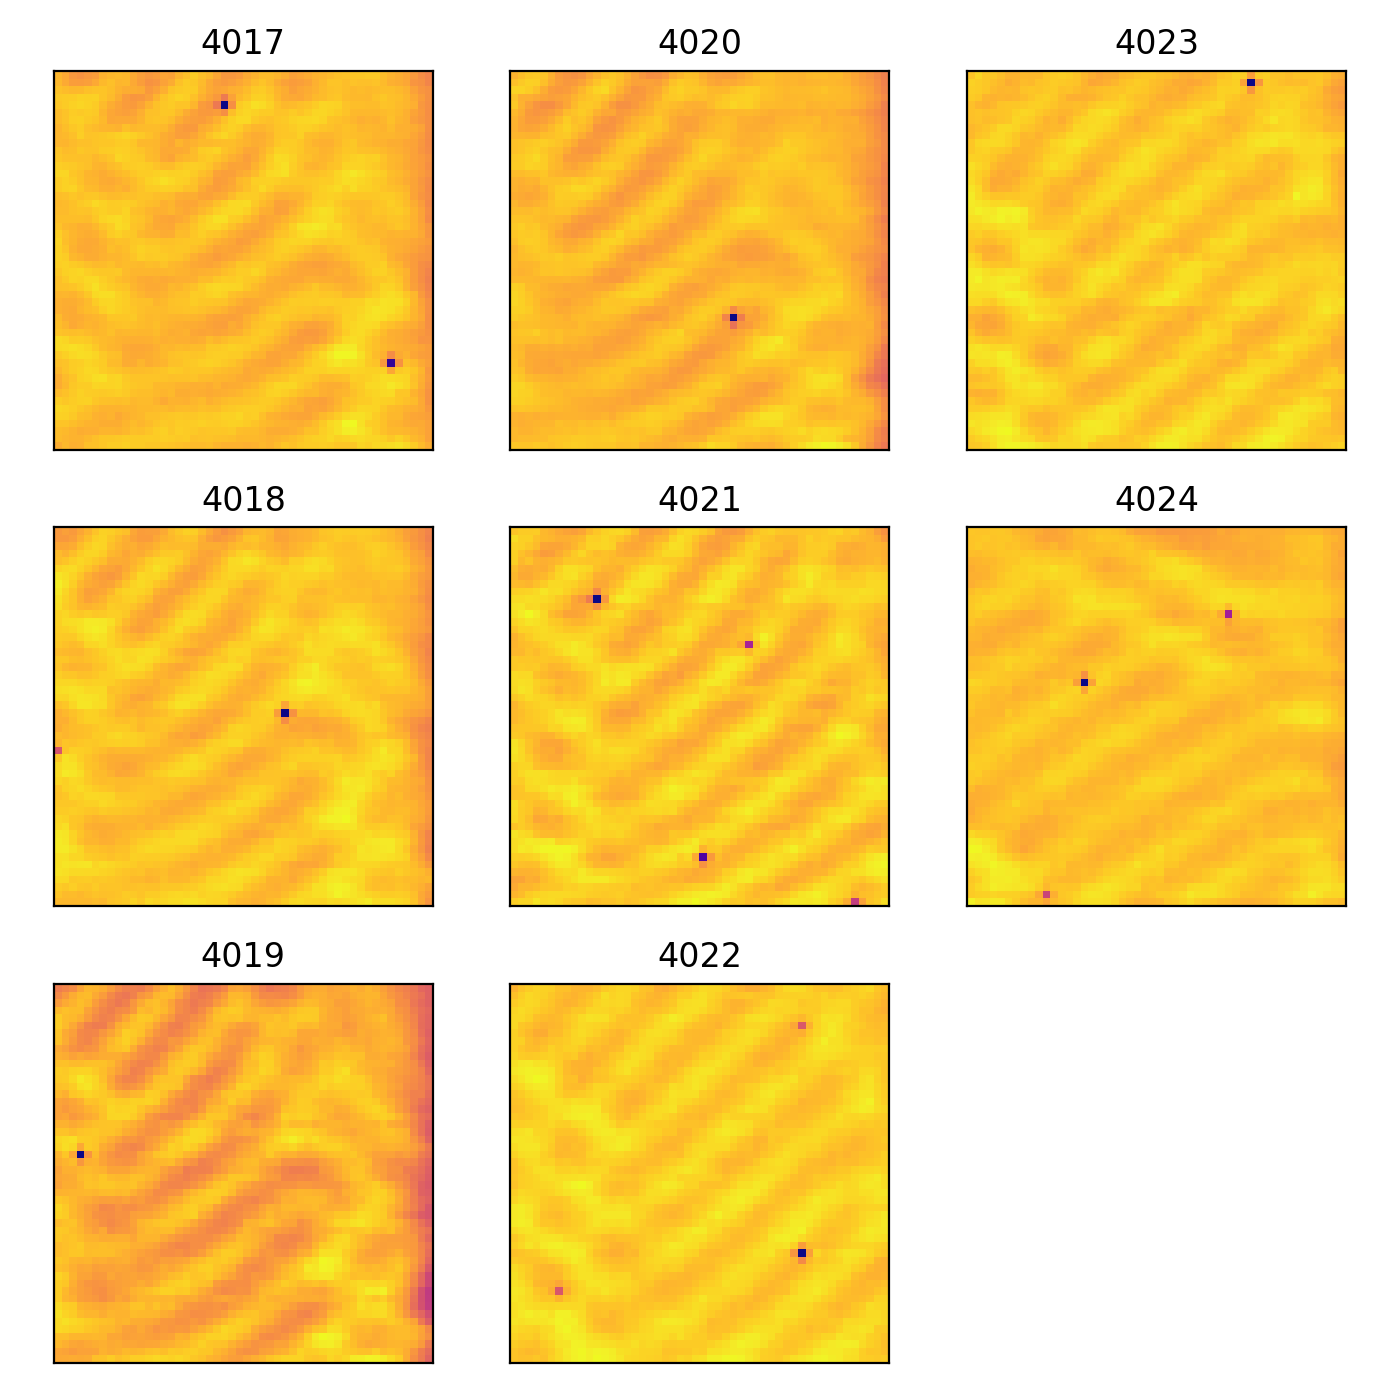

(0, 0)
(1, 0)
(2, 0)
(0, 1)
(1, 1)
(2, 1)
(0, 2)
(1, 2)


In [61]:
%matplotlib notebook


plt.figure(figsize=(7,7))
    
acc = 3
up = 3
coords = []

for i in np.arange(0,acc,1):
    for j in np.arange(0,up,1):
        coords.append((j,i))

#print(coords)
for i in np.arange(0,len(images),1):
    print(coords[i])
    ax=plt.subplot2grid((3,3),coords[i], rowspan=1,colspan=1)
    plt.imshow(sp.ndimage.gaussian_filter(images[i],0.5)
            ,interpolation='none'
            ,origin='lower'
            ,cmap = 'plasma'
          #,extent =[0,1,0,1]
    )
    plt.title(str(scan_nums[i]))

    plt.xticks([])
    plt.yticks([])
    #plt.ylabel('$\mu$m')
    #plt.xlabel('$\mu$m')
    im = Image.fromarray(images[i])
    im.save(str(scan_nums[i])+'.tif')

plt.tight_layout()
plt.show()